In [1]:
from unicodedata import normalize
import pandas as pd
from nltk import tokenize
import nltk 

from nltk.corpus import gutenberg
import random
import re
import numpy as np
from numpy.random import normal, uniform

import matplotlib.mlab as mlab
from matplotlib import pyplot as  plt
import plotly.plotly as py
from time import time
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [2]:
def reading_csv(dir):
    start = time()
    dataframe = pd.read_excel(dir)
    print('Save '+dir+' in dataframe %.2f seconds' % (time() - start))
    return dataframe

def filter_chat(dataframelist):
    df = dataframelist.loc[dataframelist['id sesion'] == dataframelist['id sesion']]
    df =  df.loc[(df['tipo participante'] == 'Usuario')]
    return df

In [3]:
dataframe = reading_csv('chatccb_full_mar_2016.xlsx')

Save chatccb_full_mar_2016.xlsx in dataframe 405.41 seconds


In [4]:
#only_one_chat= ' '.join(chat_user['mensaje'].get_values())
def filter_chat(dataframelist,human):
    df = dataframelist.loc[dataframelist['id sesion'] == dataframelist['id sesion']]
    df =  df.loc[(df['tipo participante'] == human)]
    return df

datafram_filtered_user = filter_chat(dataframe,'Usuario')
datafram_filtered_agent = filter_chat(dataframe,'Agente')
print("user-> ",len(datafram_filtered_user))
print("\nagent-> ",len(datafram_filtered_agent))
datafram_filtered_agent.dropna(subset=['mensaje'], inplace=True)
datafram_filtered_user.dropna(subset=['mensaje'], inplace=True)

user->  454326

agent->  369569


## promedio words user/agent

In [5]:
## agent
datafram_filtered_agent['cant_tokens'] = datafram_filtered_agent['mensaje'].apply(lambda token:len(tokenize.word_tokenize(str(token))))
promedio_words_agent = datafram_filtered_agent.groupby('id sesion').apply(lambda row: row['cant_tokens'].sum()/len(row)).values.tolist()

## user
datafram_filtered_user['cant_tokens'] = datafram_filtered_user['mensaje'].apply(lambda token:len(tokenize.word_tokenize(str(token))))
promedio_words_user = datafram_filtered_user.groupby('id sesion').apply(lambda row: row['cant_tokens'].sum()/len(row)).values.tolist()

## graph_promedio_words_agent & user

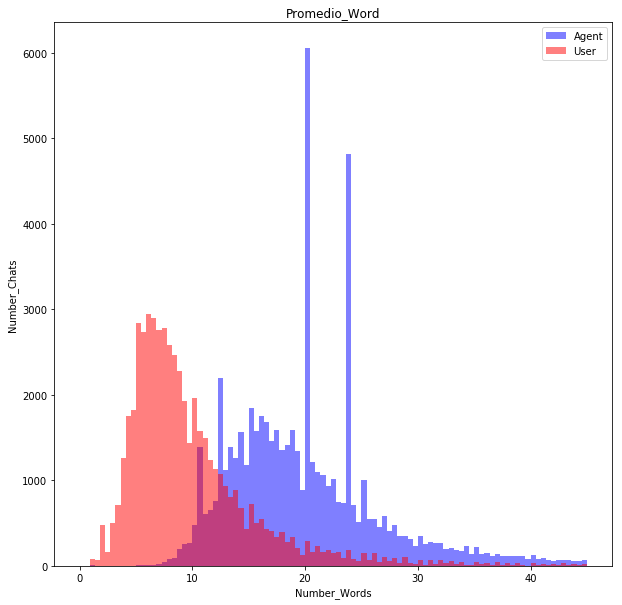

In [6]:
# size_graph
plt.figure(figsize=(10,10))

bins = np.linspace(0, 45, 100)

plt.hist(promedio_words_agent, bins, normed=False, histtype='stepfilled', color="b", alpha=0.5, label="Agent")
plt.hist(promedio_words_user, bins, normed=False, histtype='stepfilled', color="r",  alpha=0.5,label="User")

plt.title("Promedio_Word")
plt.ylabel("Number_Chats")#
plt.xlabel("Number_Words")
plt.legend()
plt.show()

## promedio letter user/agent

In [8]:
## agent
datafram_filtered_agent['cant_letter'] = datafram_filtered_agent['mensaje'].apply(lambda token:len(re.sub('\s','',re.sub('\s','',token))))
promedio_letter_agent = datafram_filtered_agent.groupby('id sesion').apply(lambda row: row['cant_letter'].sum()/len(row)).values.tolist()

## user
datafram_filtered_user['cant_letter'] = datafram_filtered_user['mensaje'].apply(lambda token:len(re.sub('\s','',re.sub('\s','',token))))
promedio_letter_user = datafram_filtered_user.groupby('id sesion').apply(lambda row: row['cant_letter'].sum()/len(row)).values.tolist()

In [9]:
print('agent-> ',len(datafram_filtered_agent['cant_letter']))
print('\nuser-> ',len(datafram_filtered_user['cant_letter']))

agent->  369569

user->  454308


## graph_promedio_letter_agent & user

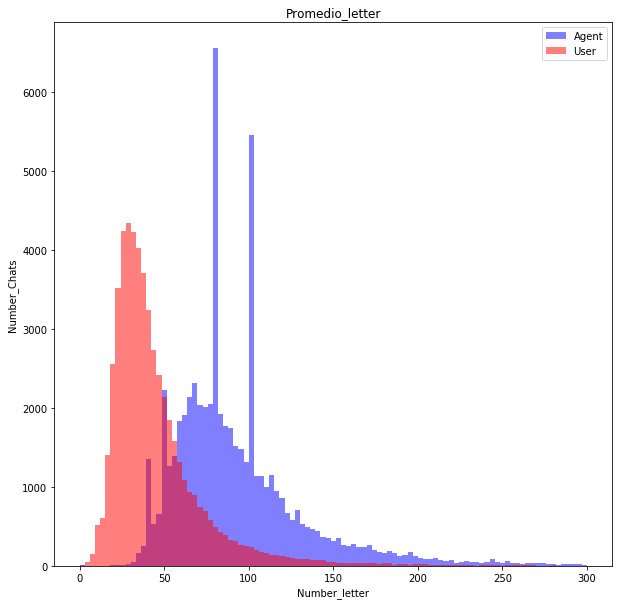

In [16]:
# size_graph
plt.figure(figsize=(10,10))

bins = np.linspace(0, 300, 100)

plt.hist(promedio_letter_agent, bins, normed=False, histtype='stepfilled', color="b", alpha=0.5, label="Agent")
plt.hist(promedio_letter_user, bins, normed=False, histtype='stepfilled', color="r",  alpha=0.5, label="User")

plt.title("Promedio_letter")
plt.ylabel("Number_Chats")#
plt.xlabel("Number_letter")
plt.legend()
plt.show()

## cloud words most use user/agent

In [11]:
## agent
most_letter_use_agent = datafram_filtered_agent['mensaje'].str.cat(sep=' ')

## user
most_letter_use_user = datafram_filtered_user['mensaje'].str.cat(sep=' ')

## graph_cloud_letter_agent & user

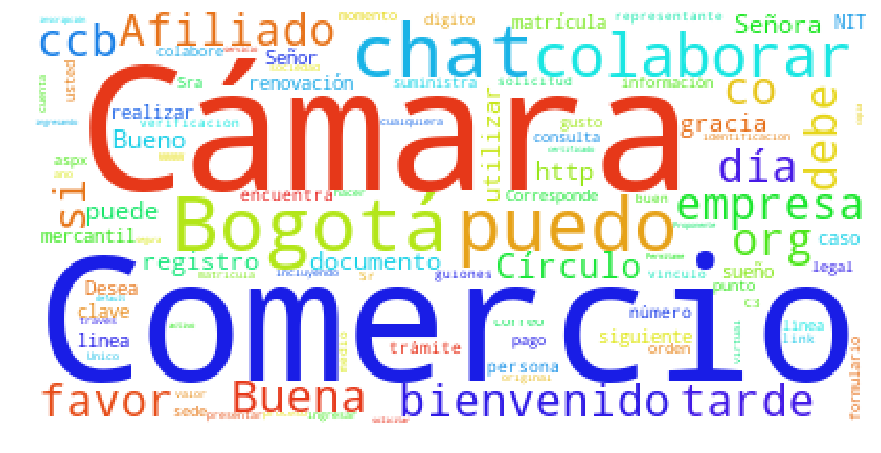

In [12]:
wordcloud = WordCloud(max_words=100, stopwords=stopwords.words('spanish'), background_color='white' ).generate(most_letter_use_agent)
#wordcloud = wordcloud(max_words=100, stopwords=stopwords.words('spanish'), background_color='white' ).generate(most_letter_use_user)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
stop_words = stopwords.words('spanish') + ['buenas','gracias','buena','tarde','luego','necesito',
                                          'señora','quiero','saber','sra','quisiera','sr','mil',
                                          'tardes','buenos','hola','gmail','com','dias','ok',
                                           'camara', 'comercio','Cámara','Bogotá',
                                           'puede','favor','buen','día', 'dia',
                                          'hago','dias','hacer','si','hace','despues',
                                           'ayuda','hoy','ahi','tambíen','tambien'
                                           ,'ma','pue','señorita','señor','internet'
                                          ,'parte','nombre','posible','entonce','hice','duda',
                                          'momento','claro','dice','perfecto','asi','bogota'
                                          ,'paso','proceso','dias','do','aparece','pues','sale'
                                           ,'co','mas','indica','bien','verdad','año'
                                           ,'caso','pregunta','pasa','días','ahora','listo','solo'
                                           ,'entonces','mira','ingreso','pregunta','decir','entiendo',
                                           'mismo','bueno','deseo','ustede','ustedes','usted','Diana','deja'
                                           ,'voy','debe','debo','hotmail','osea','nuevamente','cambio',
                                           'siguiente','debo','Alejandro','alejandro','Carolina','carolina',
                                           'pagina','aun','perdon','hora','tener','pena','cada','ser',
                                           'correo','Karen','cada','tener','poder','veo','consulta','medio'
                                           ,'inquietud','Francy','francy','puedes','ayudar','realizar',
                                           'llego','mañana','hacerlo','mucha','permite','dicen','correcto'
                                           ,'ano','puedo','podria','muchas','encuentro','ccb','org','senor',
                                           'senora','senorita','natalia','colaborar','ver','va','tenia','ver',
                                           'vale','estan','opcion','algun','error','problema','amable',
                                           'ayer','indicar','ir'
                                          ]
most_letter_use_user =  normalize('NFKD', most_letter_use_user.lower()).encode('ascii','ignore').decode('utf-8')
wordcloud_user = WordCloud(max_words=100, stopwords=stop_words, background_color='white' ).generate(most_letter_use_user)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_user)
plt.axis("off")
plt.show()

## example histogram_graph

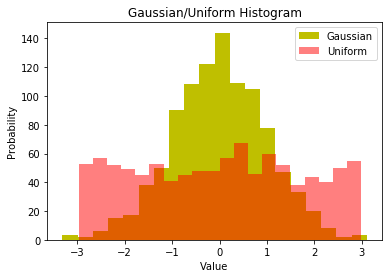

In [7]:
gaussian_numbers = normal(size=1000)
uniform_numbers = uniform(low=-3, high=3, size=1000)
plt.hist(gaussian_numbers, bins=20, histtype='stepfilled', normed=False, color='y', label='Gaussian')
plt.hist(uniform_numbers, bins=20, histtype='stepfilled', normed=False, color='r', alpha=0.5, label='Uniform')
plt.title("Gaussian/Uniform Histogram")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.show()